In [86]:
import mne
import matplotlib.pyplot as plt
import numpy as np

In [60]:
fname = "./pd.bdf"

In [61]:
raw_edf = mne.io.read_raw_bdf(fname, preload=True)
raw_array = mne.io.RawArray(raw_edf.get_data(), raw_edf.info)

# Create a montage object
montage = mne.channels.make_standard_montage("standard_1020")

# Set the channel types of the missing channels
raw_array.set_channel_types({'EXG1': 'eog', 'EXG2': 'eog', 'EXG3': 'eog',
                             'EXG4': 'eog', 'EXG5': 'eog', 'EXG6': 'eog',
                             'EXG7': 'eog', 'EXG8': 'eog'})

# Set the montage as the montage attribute of the RawArray object
raw_array.set_montage(montage)

# Now you can create a new RawArray object with the montage information
raw = mne.io.RawArray(raw_array.get_data(), raw_array.info)

Extracting EDF parameters from C:\jupyter\pd.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
Creating RawArray with float64 data, n_channels=41, n_times=95232
    Range : 0 ... 95231 =      0.000 ...   185.998 secs
Ready.
Creating RawArray with float64 data, n_channels=41, n_times=95232
    Range : 0 ... 95231 =      0.000 ...   185.998 secs
Ready.


In [62]:
ica = mne.preprocessing.ICA(n_components=32, max_iter=1000)
ica.fit(raw.copy().filter(1,4), verbose=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 32 components


C:\Users\Abdel\miniconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 276.1s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,1000 iterations on raw data (95232 samples)
ICA components,32
Available PCA components,32
Channel types,eeg
ICA components marked for exclusion,—


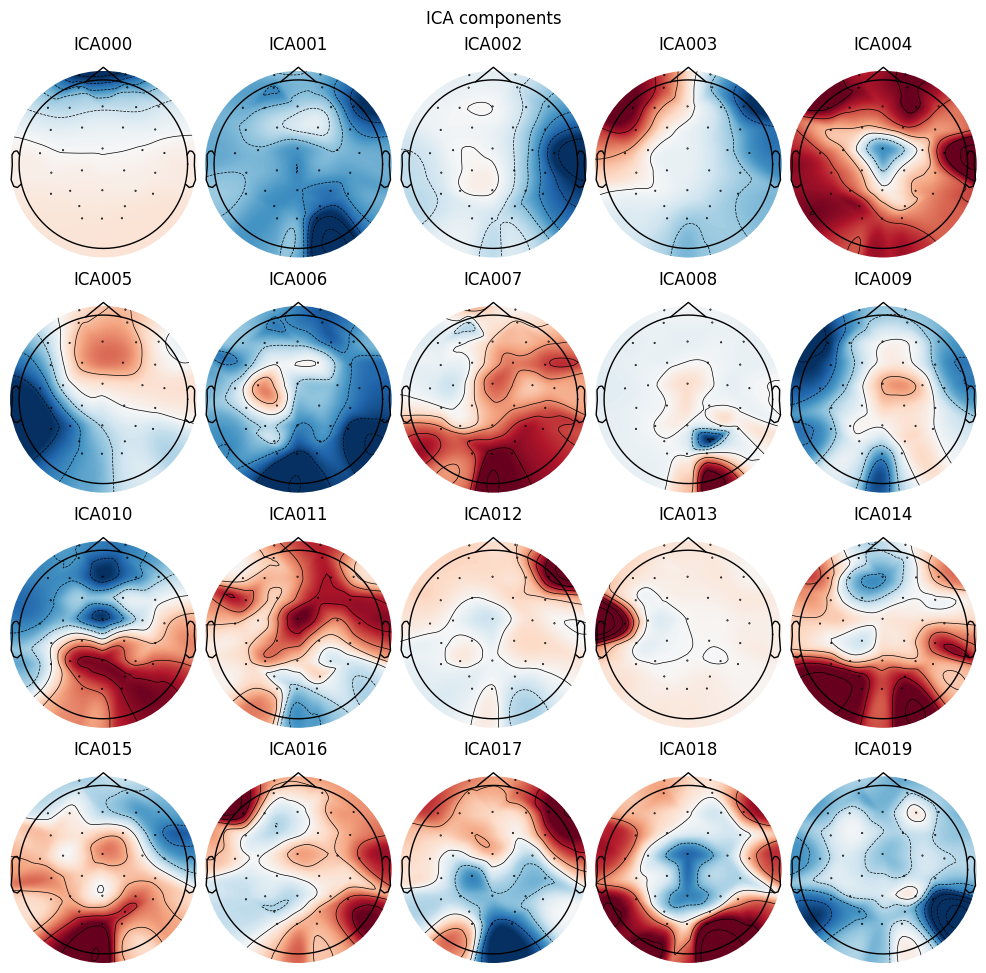

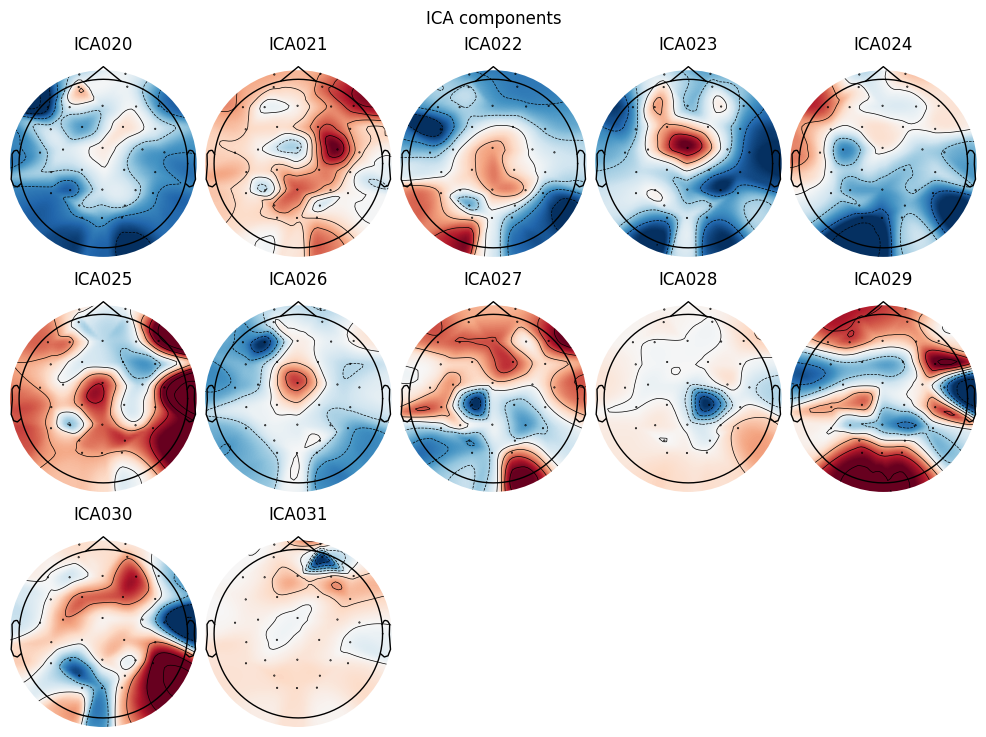

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x731.5 with 12 Axes>]

In [63]:
ica.plot_components()

In [67]:
ica.exclude = [0,8,12,13,31]

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 5 ICA components
    Projecting back using 32 PCA components


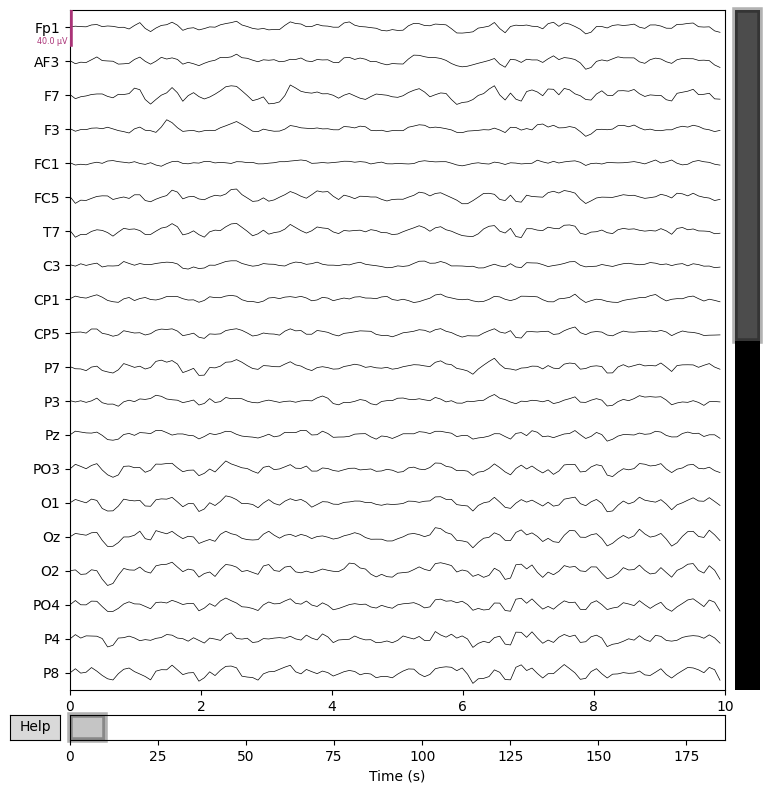

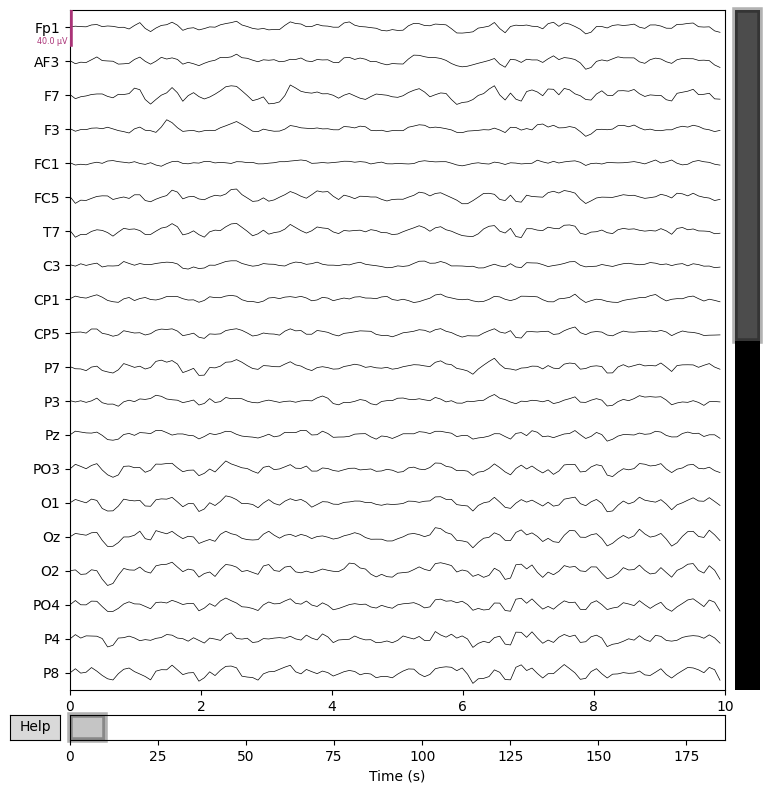

In [68]:

ica.apply(raw.copy().filter(1,4), exclude= ica.exclude).plot()

In [69]:
event_ids = {"standard/stimulus": 1, "target/stimulus":1}
events = mne.find_events(raw)
epochs = mne.Epochs(raw, events, event_id=event_ids)

Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1 event found on stim channel Status
Event IDs: [1]
Not setting metadata
1 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


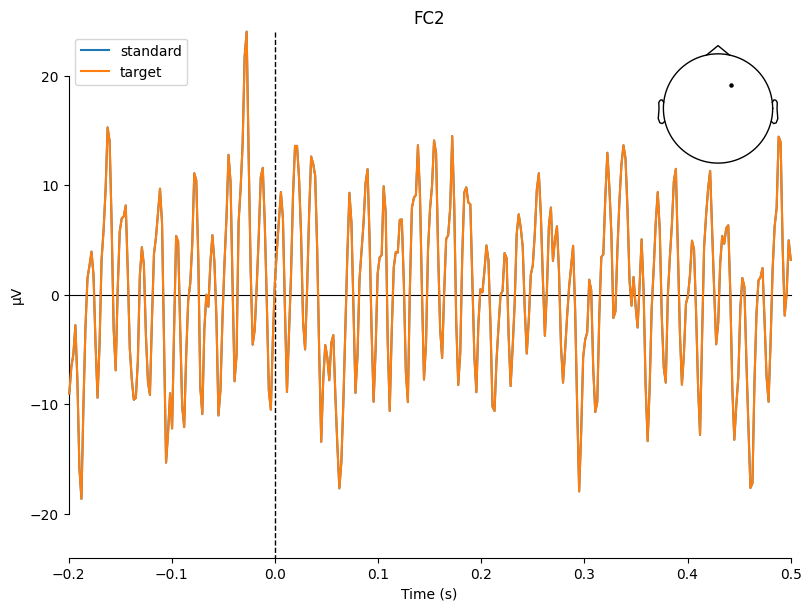

[<Figure size 800x600 with 2 Axes>]

In [70]:
target = epochs["target"].average()
standard= epochs["standard"].average()
mne.viz.plot_compare_evokeds({"standard" : standard, "target": target}, picks=[25])

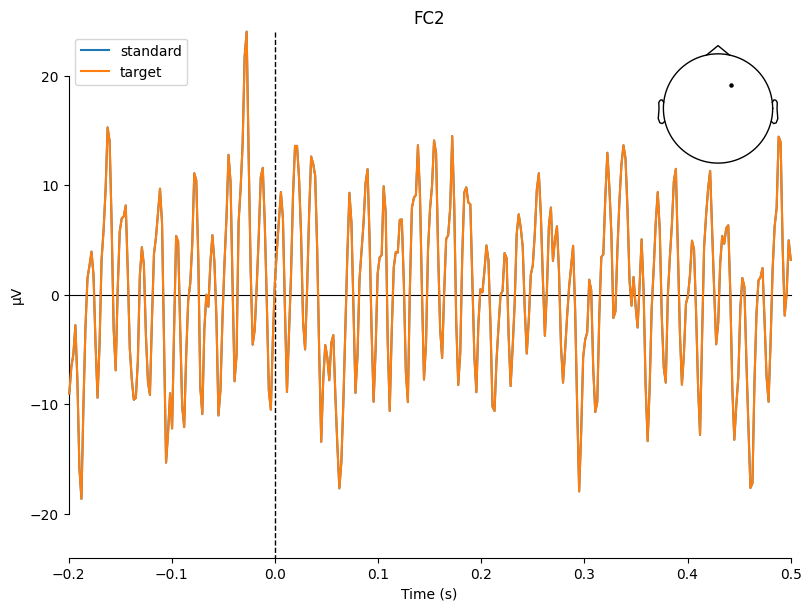

[<Figure size 800x600 with 2 Axes>]

In [70]:
target = epochs["target"].average()
standard= epochs["standard"].average()
mne.viz.plot_compare_evokeds({"standard" : standard, "target": target}, picks=[25])

In [107]:
data = raw.get_data()
psd = mne.time_frequency.psd_array_welch(data, raw.info['sfreq'])

SyntaxError: incomplete input (2852497273.py, line 3)